<a href="https://colab.research.google.com/github/Shreyashh09/PBL-2/blob/main/COVIDSenti_B_27k.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
from google.colab import files
uploaded = files.upload()

Saving COVIDSenti-B.csv to COVIDSenti-B.csv


In [6]:
import random

random.seed(42)

twitter_data = pd.read_csv('COVIDSenti-B.csv')

n = 27000
skiprows = sorted(
    random.sample(range(1, twitter_data.shape[0] + 1),
                  twitter_data.shape[0] - n))

twitter_data = pd.read_csv('COVIDSenti-B.csv', skiprows=skiprows)

twitter_data.head()

,tweet,label
0,Coronavirus fears expose a cultural divide ove...,neu
1,Coronavirus Live Updates: Global Outbreak Rais...,neu
2,"Ruling party, government mull W10tr to tackle ...",neu
3,Exclusive: Thousands in Coronavirus Epicenter ...,neg
4,"@Queen_kimo_ Derp derp, what's that have to do...",neu


In [7]:
twitter_data.shape

(27000, 2)

In [8]:
twitter_data.isnull().sum()

,0
tweet,0
label,0


In [9]:
twitter_data.isnull().sum()

,0
tweet,0
label,0


In [10]:
twitter_data['label'].value_counts()

,count
label,
neu,20241
neg,4920
pos,1839


In [11]:
# 0-> neutral, 1-> positive 2-> negative
twitter_data['label'] = twitter_data['label'].replace({'neu': 0, 'pos': 1, 'neg': 2})

print(twitter_data['label'].value_counts())

label
0    20241
2     4920
1     1839
Name: count, dtype: int64


<ipython-input-11-e3ad959fbf97>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  twitter_data['label'] = twitter_data['label'].replace({'neu': 0, 'pos': 1, 'neg': 2})


In [12]:
port_stem = PorterStemmer()

In [13]:
def stemming(content):
  stemmed_content = re.sub('[^a-zA-Z]', ' ', content)
  stemmed_content = stemmed_content.lower()
  stemmed_content = stemmed_content.split()
  stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
  stemmed_content = ' '.join(stemmed_content)

  return stemmed_content

In [14]:
twitter_data['stemmed_content'] = twitter_data['tweet'].apply(stemming)
twitter_data.head()

,tweet,label,stemmed_content
0,Coronavirus fears expose a cultural divide ove...,0,coronaviru fear expos cultur divid mask san ga...
1,Coronavirus Live Updates: Global Outbreak Rais...,0,coronaviru live updat global outbreak rais fea...
2,"Ruling party, government mull W10tr to tackle ...",0,rule parti govern mull w tr tackl covid covid ...
3,Exclusive: Thousands in Coronavirus Epicenter ...,2,exclus thousand coronaviru epicent violat quar...
4,"@Queen_kimo_ Derp derp, what's that have to do...",0,queen kimo derp derp deal spread new coronavir...


In [15]:
X = twitter_data['stemmed_content'].values
Y = twitter_data['label'].values

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, stratify=Y, random_state=2)

In [17]:
print(X.shape, X_train.shape, X_test.shape)

(27000,) (21600,) (5400,)


In [18]:
vectorizer = TfidfVectorizer()
vectorizer.fit(X_train)

X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

In [19]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train, Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [20]:
predictions = model.predict(X_test)
print(accuracy_score(Y_test, predictions))

0.84


In [21]:
predictions_train = model.predict(X_train)
print(accuracy_score(Y_train, predictions_train))

0.8820370370370371


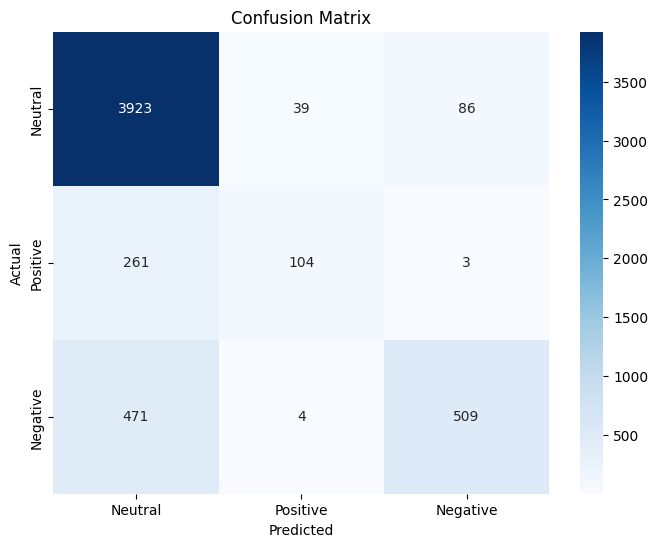

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(Y_test, predictions)

# Plotting the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Neutral', 'Positive', 'Negative'],
            yticklabels=['Neutral', 'Positive', 'Negative'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [23]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    layers.Dense(64, activation='relu'),  # Hidden layer
    layers.Dense(3, activation='softmax')  # Output layer with softmax for multi-class
])


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use sparse_categorical_crossentropy for integer labels
              metrics=['accuracy'])

# Train the model
model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_split=0.1)  # Adjust epochs and batch_size as needed

# Evaluate the model
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


# Make predictions
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1) # Get the class with highest probability

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
608/608 ━━━━━━━━━━━━━━━━━━━━ 52s 83ms/step - accuracy: 0.7681 - loss: 0.6870 - val_accuracy: 0.8435 - val_loss: 0.4352
Epoch 2/10
608/608 ━━━━━━━━━━━━━━━━━━━━ 83s 85ms/step - accuracy: 0.9379 - loss: 0.1800 - val_accuracy: 0.8250 - val_loss: 0.5153
Epoch 3/10
608/608 ━━━━━━━━━━━━━━━━━━━━ 80s 82ms/step - accuracy: 0.9903 - loss: 0.0395 - val_accuracy: 0.8236 - val_loss: 0.6845
Epoch 4/10
608/608 ━━━━━━━━━━━━━━━━━━━━ 49s 80ms/step - accuracy: 0.9974 - loss: 0.0124 - val_accuracy: 0.8236 - val_loss: 0.7777
Epoch 5/10
608/608 ━━━━━━━━━━━━━━━━━━━━ 57s 93ms/step - accuracy: 0.9990 - loss: 0.0046 - val_accuracy: 0.8134 - val_loss: 0.8943
Epoch 6/10
608/608 ━━━━━━━━━━━━━━━━━━━━ 48s 80ms/step - accuracy: 0.9995 - loss: 0.0022 - val_accuracy: 0.8148 - val_loss: 0.9476
Epoch 7/10
608/608 ━━━━━━━━━━━━━━━━━━━━ 48s 79ms/step - accuracy: 0.9999 - loss: 7.8086e-04 - val_accuracy: 0.8028 - val_loss: 0.9450
Epoch 8/10
608/608 ━━━━━━━━━━━━━━━━━━━━ 82s 80ms/step - accuracy: 0.9998 - loss: 8.731

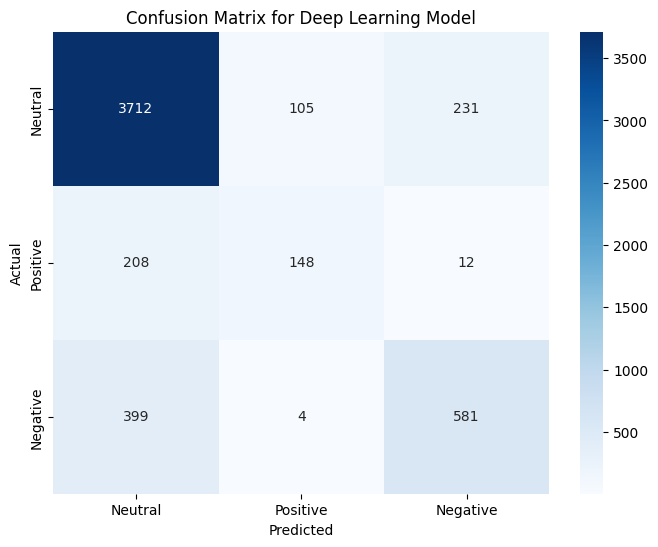

In [24]:
cm = confusion_matrix(Y_test, predicted_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Neutral', 'Positive', 'Negative'],
            yticklabels=['Neutral', 'Positive', 'Negative'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Deep Learning Model')
plt.show()

SVM Accuracy: 0.8631481481481481


Text(0.5, 1.0, 'Confusion Matrix for SVM Model')

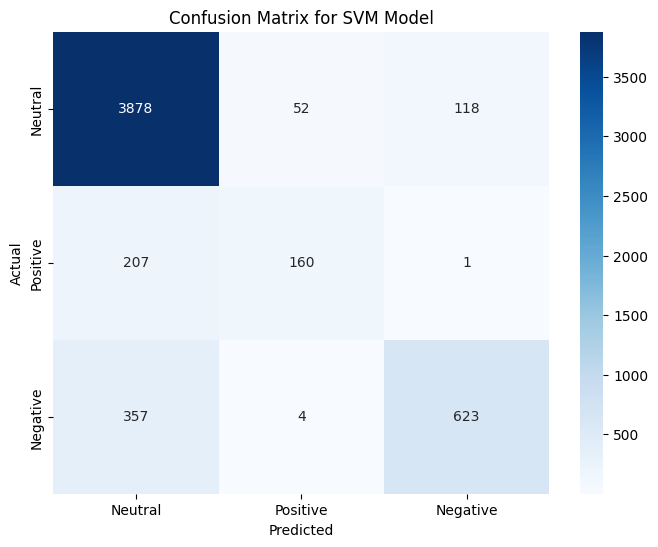

In [25]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear', C=1)
svm_model.fit(X_train, Y_train)
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(Y_test, svm_predictions)
print(f"SVM Accuracy: {svm_accuracy}")
svm_cm = confusion_matrix(Y_test, svm_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Neutral', 'Positive', 'Negative'],
            yticklabels=['Neutral', 'Positive', 'Negative'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM Model')

Using lemmatization instead of Stemming


In [26]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [27]:
from nltk.stem import WordNetLemmatizer

In [28]:
lemmatizer = WordNetLemmatizer()

In [29]:
def lemmatization(content):
    lemmatized_content = re.sub('[^a-zA-Z]', ' ', content)
    lemmatized_content = lemmatized_content.lower()
    lemmatized_content = lemmatized_content.split()
    lemmatized_content = [lemmatizer.lemmatize(word) for word in lemmatized_content if not word in stopwords.words('english')]
    lemmatized_content = ' '.join(lemmatized_content)
    return lemmatized_content

In [30]:
twitter_data['lemmed_content'] = twitter_data['tweet'].apply(lemmatization)
twitter_data.head()

,tweet,label,stemmed_content,lemmed_content
0,Coronavirus fears expose a cultural divide ove...,0,coronaviru fear expos cultur divid mask san ga...,coronavirus fear expose cultural divide mask s...
1,Coronavirus Live Updates: Global Outbreak Rais...,0,coronaviru live updat global outbreak rais fea...,coronavirus live update global outbreak raise ...
2,"Ruling party, government mull W10tr to tackle ...",0,rule parti govern mull w tr tackl covid covid ...,ruling party government mull w tr tackle covid...
3,Exclusive: Thousands in Coronavirus Epicenter ...,2,exclus thousand coronaviru epicent violat quar...,exclusive thousand coronavirus epicenter viola...
4,"@Queen_kimo_ Derp derp, what's that have to do...",0,queen kimo derp derp deal spread new coronavir...,queen kimo derp derp dealing spread new corona...


In [31]:
X_lem = twitter_data['lemmed_content'].values
Y_lem = twitter_data['label'].values

In [32]:
X_train_lem, X_test_lem, Y_train_lem, Y_test_lem = train_test_split(X_lem,Y_lem, test_size=0.2, stratify=Y, random_state=2)

In [33]:
vectorizer = TfidfVectorizer()
vectorizer.fit(X_train_lem)

X_train_lem = vectorizer.transform(X_train_lem)
X_test_lem = vectorizer.transform(X_test_lem)

In [34]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train_lem, Y_train_lem)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [35]:
predictions_lem = model.predict(X_test_lem)
print(accuracy_score(Y_test_lem, predictions_lem))


0.8418518518518519


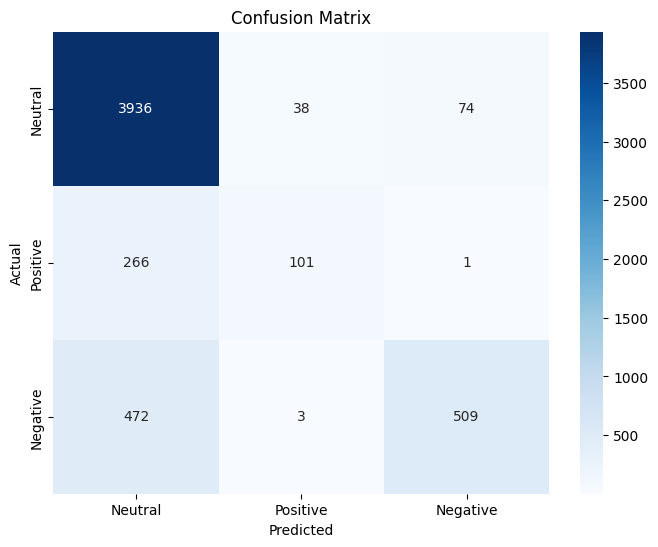

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(Y_test_lem, predictions_lem)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Neutral', 'Positive', 'Negative'],
            yticklabels=['Neutral', 'Positive', 'Negative'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()